## Tarea 11.1

Jhonatan Jurado Rodríguez

1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Generar datasets
datasets = {
    "moons": make_moons(n_samples=300, noise=0.2, random_state=42),
    "circles": make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42),
    "blobs": make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
}

In [4]:
# Parámetros para Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Parámetro del kernel RBF
    'kernel': ['rbf']  # Usamos solo el kernel radial
}

best_models = {}

# Entrenar un SVM para cada dataset y encontrar los mejores parámetros
for name, (X, y) in datasets.items():
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejores parámetros para {name}: {grid_search.best_params_}")

Mejores parámetros para moons: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejores parámetros para circles: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mejores parámetros para blobs: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


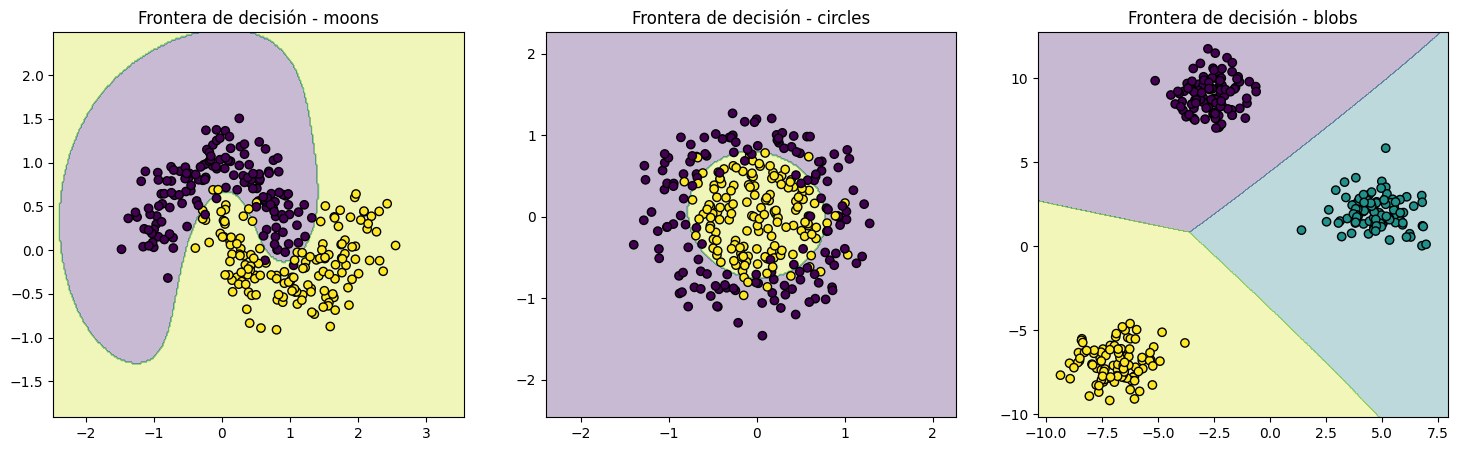

In [5]:
# Visualizar las fronteras de decisión para cada dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, (X, y)) in zip(axes, datasets.items()):
    model = best_models[name]
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(f"Frontera de decisión - {name}")

plt.show()

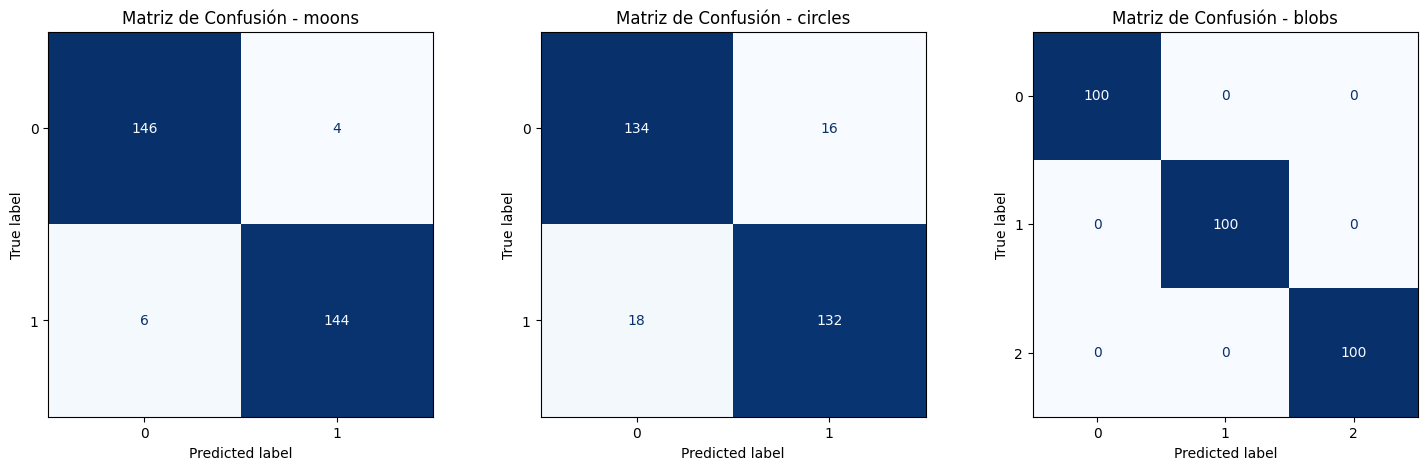

In [6]:
# Dibujar la matriz de confusión para cada dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, (X, y)) in zip(axes, datasets.items()):
    model = best_models[name]
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Matriz de Confusión - {name}")

plt.show()